Student performance predection based on parenental education, gender, ethnicity, lunch time, study time for test



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df =  pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


there are no missing values in the dataset




In [8]:
# to check if thier is any duplicate values
df.duplicated().sum()


0

In [9]:
# to check the uniquniess of the data

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
# EDA

print("categories in gender: ", end=" ")
print(df['gender'].unique())

print("categories in race: ", end=" ")
print(df['race_ethnicity'].unique())

print("categories in parental level of education: ", end=" ")
print(df['parental_level_of_education'].unique())

print("categories in lunch: ", end=" ")
print(df['lunch'].unique())

print("categories in test preparation course: ", end=" ")
print(df['test_preparation_course'].unique())

categories in gender:  ['female' 'male']
categories in race:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch:  ['standard' 'free/reduced']
categories in test preparation course:  ['none' 'completed']


In [12]:
num_feature =  [fea   for fea in df.columns if df[fea].dtype != 'object']
cat_features = [fea for fea in df.columns if df[fea].dtype == "object"  ]

In [13]:
print(num_feature)
print(cat_features)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
print(f"we have  {len(num_feature)} num features and they are {num_feature}")
print(f"we have {len(cat_features)} categorical features and they are {cat_features}")

we have  3 num features and they are ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features and they are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df['total_score'] = df["math_score"] + df["reading_score"] +  df["writing_score"]
df["average_score"] = round(df["total_score"] / 3, 2)

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [18]:
math_full = df[df['math_score'] == 100]['average_score'].count()
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()

In [19]:
print(f"count of reading score {reading_full}")
print(f"count of writing score {writing_full}")
print(f"count of math score {math_full}")

count of reading score 17
count of writing score 14
count of math score 7


In [20]:
math_low = df[df['math_score'] <= 20]['average_score'].count()
reading_low = df[df['reading_score'] <= 20]['average_score'].count()
writing_low = df[df['writing_score'] <= 20]['average_score'].count()

In [21]:
print(f"count of low reading score {reading_low}")
print(f"count of low writing score {writing_low}")
print(f"count of low math score {math_low}")

count of low reading score 1
count of low writing score 3
count of low math score 4


<Axes: xlabel='average_score', ylabel='Count'>

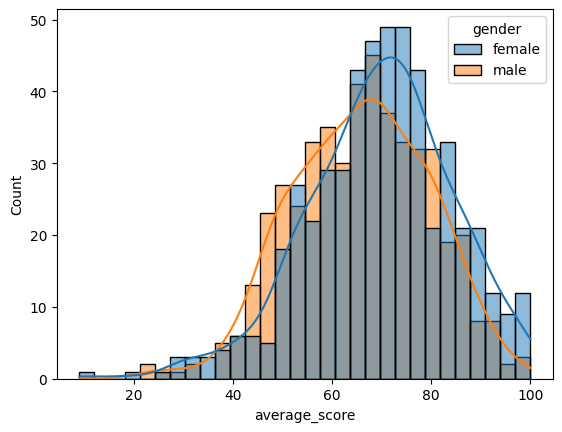

In [22]:
# sns.histplot(data=df,x="average_score", bins=30, kde=True )

sns.histplot(data=df,x="average_score", bins=30, kde=True, hue='gender' )

<Axes: xlabel='gender', ylabel='total_score'>

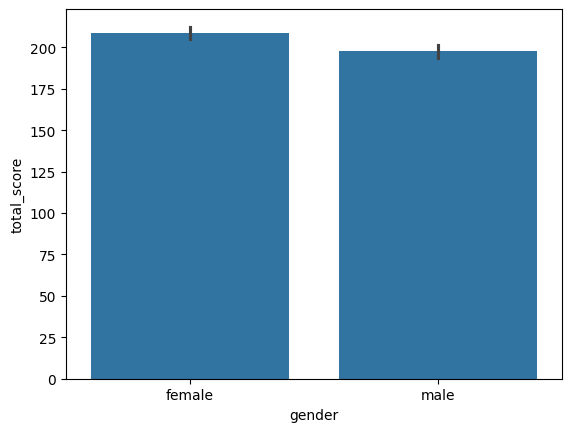

In [23]:
sns.barplot(data=df, x="gender", y="total_score")

In [24]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


<Axes: xlabel='race_ethnicity', ylabel='total_score'>

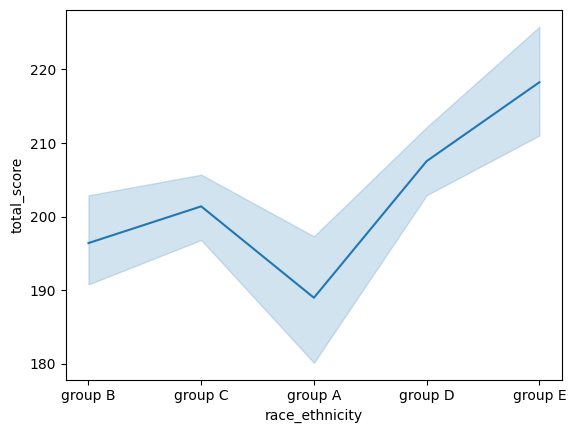

In [25]:
sns.lineplot(data=df, x="race_ethnicity", y="total_score")

<Axes: xlabel='parental_level_of_education', ylabel='total_score'>

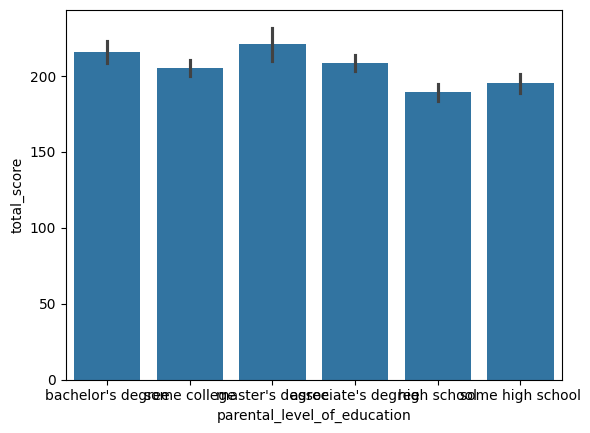

In [26]:
sns.barplot(data=df, x="parental_level_of_education", y="total_score")